In [1]:
######################Generating CSV file

import cv2
import csv
import glob
import pandas as pd
from sklearn.utils import shuffle
import os

# Specify the CSV file name
csv_file = 'top_part.csv'

# Check if the file exists and delete it
if os.path.exists(csv_file):
    os.remove(csv_file)
    print(f"Deleted existing {csv_file} file.")

# Initialize the header
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

# Create the CSV file and write the header
with open(csv_file, 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# List of character folders
character_folders = ["e","i"]

# Loop through character folders
for character_folder in character_folders:
    dirList = glob.glob("baybayin_images/" + character_folder + "/*.jpg")

    # Get label from folder name
    label = character_folder

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (1, 1), 0)
        # im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)

        rows, cols = roi.shape

        # Threshold using Otsu's method
        _, thresholded = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        for i in range(rows):
            for j in range(cols):
                k = thresholded[i, j]
                data.append(k)

        # Print data for debugging
        print(data)

        with open('top_part.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Load and shuffle the dataset
dataset = pd.read_csv('top_part.csv')
shuffled_dataset = shuffle(dataset)
print(shuffled_dataset)


C:\Users\JM\AppData\Local\Temp\ipykernel_10688\2963292853.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Deleted existing top_part.csv file.
['e', 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

In [2]:

###########################################################Separating labels and pixels into y and x axis respectively


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Load and shuffle the dataset
dataset = pd.read_csv('top_part.csv')
shuffled_dataset = shuffle(dataset)

# Separate dependent and independent variables
X = shuffled_dataset.drop(["label"], axis=1)
Y = shuffled_dataset["label"]


i


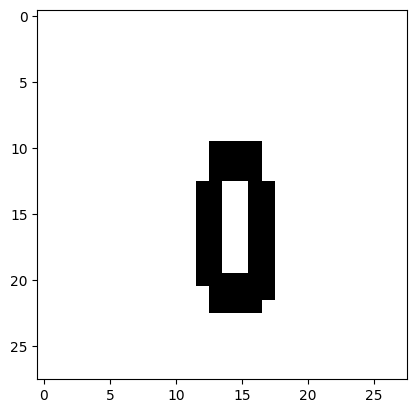

In [3]:

################################################################Show an image on how it look like in grayscale with 2 values, black and whit

%matplotlib inline
idx = 180
img = X.loc[idx].values.reshape(28, 28)
print(Y[idx])
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.show()


In [4]:

####################################################################Splitting data set into training and testing data

# Train-Test split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [5]:
####################################################################Training the model 

import joblib
from sklearn.svm import SVC
import os

# Specify the model file name
model_file = 'model/baybayintop_model'

# Check if the file exists and delete it
if os.path.exists(model_file):
    os.remove(model_file)
    print(f"Deleted existing {model_file} file.")


# Fit the model using SVC
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

# Save the model using joblib
joblib.dump(classifier, "model/baybayintop_model")
                   

Deleted existing model/baybayintop_model file.


['model/baybayintop_model']

In [6]:

####################################################################Calculate accuracy

from sklearn import metrics

# Calculate accuracy
prediction = classifier.predict(test_x)
accuracy = metrics.accuracy_score(prediction, test_y)
print("Accuracy =", accuracy)

                   

Accuracy = 0.948051948051948
